# K-means 

In this notebook we will look at all the all the ingridient of TensorFlow to code up K-means 
clustering algorithm after which will be write the code.

In [1]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd 

/Users/Christopher_old/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/Christopher_old/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [15]:
vectors = tf.constant([2, 3, 6, 22]) # make 1-D vector with 4 elements
vector_2d = tf.constant(np.arange(12).reshape((2,6))) # 2d vector
shuffled_vector = tf.random_shuffle(vectors) # shuffle the vector
sliced_vector = tf.slice(vectors,[0],[2]) # take a slice starting at position zero untill postion 2
sliced_2d_vector = tf.slice(vector_2d,[0,1],[2,2]) # take a slice starting at position zero untill postion 2  
expanded_vector = tf.expand_dims(vectors,1) # epxand vector by 1 dimension

sess = tf.Session()
print 'Vector', sess.run(vectors)
print '2d-vector'
print  sess.run(vector_2d)
print 'Shuffled vector', sess.run(shuffled_vector)
print 'Sliced vector', sess.run(sliced_vector)
print 'Sliced 2d-vector' 
print sess.run(sliced_2d_vector)
print 'Expanded vector',sess.run(expanded_vector)
sess.close()

Vector [ 2  3  6 22]
2d-vector
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
Shuffled vector [22  2  6  3]
Sliced vector [2 3]
Sliced 2d-vector
[[1 2]
 [7 8]]
Expanded vector [[ 2]
 [ 3]
 [ 6]
 [22]]


In [3]:
a = tf.constant([21, 5, 12, 33])
b = tf.constant([12, 7, 5, 44])

a_sub_b = tf.sub(a, b) # a minus b  
square_a = tf.square(a) # a^2 
reduce_sum = tf.reduce_sum(a) # take sum along axis 
argmin = tf.argmin(a, 0)

sess = tf.Session()
print 'a_sub_b' , sess.run(a_sub_b)
print 'sqaure_a', sess.run(square_a)
print 'reduce_sum', sess.run(reduce_sum) 
print 'argmin', sess.run(argmin) # 5 is minimum, so should return the index of 5. 
sess.close()

a_sub_b [  9  -2   7 -11]
sqaure_a [ 441   25  144 1089]
reduce_sum 71
argmin 1


In [4]:
equal = tf.equal(a, a) # return boolean array 
where = tf.where(equal) #  return indeceses wher array equals True 
reshape = tf.reshape(a,[2,2]) # reshape  a tensor
gather = tf.gather(a,[3,0])   # take elements in 3 and 0th index from a  
concat_0 = tf.concat(0, [reshape, reshape]) # concatetenate along axis = 0  
concat_1 = tf.concat(1, [reshape, reshape]) # concatetenate along axis = 1

c = tf.Variable(2)
d = tf.Variable(3)
assign = tf.assign(c, d) # assing value d to tensor c, can be done with dimension check
                         # returns the assigned value
init_op = tf.initialize_all_variables()
sess = tf.Session()
print 'vector a =', sess.run(vectors)
print 'equal =',sess.run(equal)
print 'where ='
print sess.run(where)
print 'reshape ='
print sess.run(reshape)
print 'gather =', sess.run(gather)
print 'concat_0 ='
print sess.run(concat_0)
print 'concat_1 ='
print sess.run(concat_1)
sess.run(init_op)
print 'assign =', sess.run(assign)
sess.close()

vector a = [ 2  3  6 22]
equal = [ True  True  True  True]
where =
[[0]
 [1]
 [2]
 [3]]
reshape =
[[21  5]
 [12 33]]
gather = [33 21]
concat_0 =
[[21  5]
 [12 33]
 [21  5]
 [12 33]]
concat_1 =
[[21  5 21  5]
 [12 33 12 33]]
assign = 3


Lets make some data to preform K-means clustering on by drawing from two multivariate normals and plot visualizing them

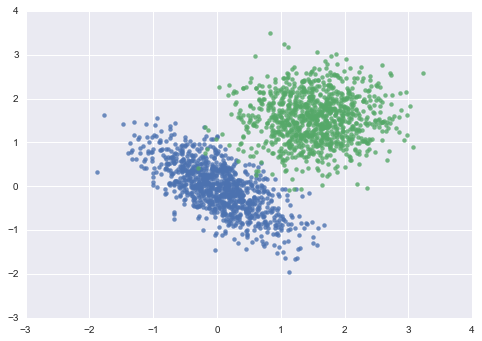

In [16]:
cluster_1 = np.random.multivariate_normal([0,0], [[0.3, -0.2],[-0.2, 0.3]], 1000)
cluster_2 = np.random.multivariate_normal([1.5, 1.5], [[0.3, 0],[0, 0.3]], 1000)
cluster = np.append(cluster_1, cluster_2, axis=0)
sns.regplot(cluster_1[:,0], cluster_1[:,1], fit_reg=False)
sns.regplot(cluster_2[:,0], cluster_2[:,1], fit_reg=False)
df = pd.DataFrame(cluster, columns=['x', 'y']) # put the data in a DataFrame

In [22]:
N_CENTROIDS = 10

vectors = tf.constant(cluster) # transform the numpy array to tf
centroids = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[N_CENTROIDS,-1])) # random centroins
print vectors.get_shape()
print centroids.get_shape() # 10 random centroids 

(2000, 2)
(10, 2)


In [28]:
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)

print expanded_vectors.get_shape()
print expanded_centroids.get_shape()

(1, 2000, 2)
(10, 1, 2)


In [37]:
### calulate all the distances to the N centroids and assing a cluster 
distances = tf.reduce_sum(tf.square(tf.sub(expanded_vectors, expanded_centroids)), 2)
assignments = tf.argmin(distances, 0)

print distances.get_shape()
print assignments.get_shape()

(10, 2000)
(2000,)


In [49]:
### calulate mean of each of the N-clusetr
means = tf.concat(0, [
  tf.reduce_mean(
      tf.gather(vectors, 
                tf.reshape(
                  tf.where(
                    tf.equal(assignments, c)
                  ),[1,-1])
               ),reduction_indices=[1])
  for c in xrange(N_CENTROIDS)])

### for cluster 0 ###
bool_array = tf.equal(assignments, 0)
location_array = tf.where(bool_array)
reshaped_loc_array = tf.reshape(location_array,[1,-1])
array_with_relevant_points = tf.gather(vectors, reshaped_loc_array)
mean_of_cluster_0 = tf.reduce_mean(array_with_relevant_points, reduction_indices=[1])

print bool_array.get_shape()
print location_array.get_shape()
print reshaped_loc_array.get_shape()
print array_with_relevant_points.get_shape()
print mean_of_cluster_0.get_shape()

(2000,)
(?, 1)
(1, ?)
(1, ?, 2)
(1, 2)


In [50]:
update_centroids = tf.assign(centroids, means) # assing the new means as centroids
init_op = tf.initialize_all_variables()

In [51]:
with tf.Session() as sess:
    sess.run(init_op)
    for step in xrange(100):
        _, centroid_values, assignment_values = sess.run([update_centroids,
                                                          centroids,
                                                          assignments])
    print "centroids"
    print centroid_values

centroids
[[ 0.21134419  0.34441334]
 [ 0.85893726  1.78985703]
 [ 1.61728413  1.61904423]
 [-0.32948359  0.04779185]
 [ 0.91477556 -0.85170362]
 [-0.6845458   0.78835948]
 [ 1.43010945  0.91640781]
 [ 2.34384477  1.42075346]
 [ 0.27226339 -0.40711482]
 [ 1.73470406  2.34109983]]


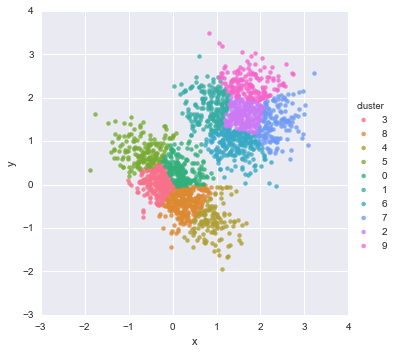

In [52]:
df['cluster'] = assignment_values
sns.lmplot('x', 'y', data=df, fit_reg=False, hue='cluster')